In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.optimize

from datetime import datetime
import pytz

import gm2
import trfp
import helper_function_candidates as helper
import plotting_functions as plt2

Welcome to JupyROOT 6.12/04


In [2]:
blinds = [15.044, 1.600, -4.598, -4.517, -2.102, 2.406]

In [3]:
%%time

fp_moment_df_1 = helper.import_fp_moment_runs('9day_fixed_probe_runs_1.h5', range(4141,4179))

fp_moment_df_2 = helper.import_fp_moment_runs('9day_fixed_probe_runs_2.h5', range(4193,4223))
fp_moment_df_3 = helper.import_fp_moment_runs('9day_fixed_probe_runs_3.h5', range(4229,4263))
fp_moment_df_4 = helper.import_fp_moment_runs('9day_fixed_probe_runs_4.h5', range(4268,4489))

Appending fixed probe runs.
No run 4178 in hdf5 file.                               
Done appending fixed probe runs.
Appending fixed probe runs.
Appending run 4222.                              
Done appending fixed probe runs.
Appending fixed probe runs.
Appending run 4262.                                  
Done appending fixed probe runs.
Appending fixed probe runs.
Appending run 4283. file.   

/home/aetb/.local/lib/python2.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Appending run 4488. file.                                                                                                                                                                                            
Done appending fixed probe runs.
CPU times: user 35.3 s, sys: 3min 2s, total: 3min 37s
Wall time: 3min 57s


### first block of 9 day

first trolley run: 4138

second trolley run: 4181

In [4]:
# import all trolley runs (keep CW run for baselines)
tr_moment_df_1 = helper.import_tr_moment_runs('9day_trolley_runs_1.h5',
                                                                   range(4138, 4139),
                                                                   corrected=True)

tr_moment_df_2 = helper.import_tr_moment_runs('9day_trolley_runs_2.h5',
                                                                   range(4181,4182),
                                                                   corrected=True)


tr_baseline_1, fp_baseline_1, baseline_time_1, summed_azimuth_1, summed_pts_1 = helper.trolley_run_station_average(tr_moment_df_1)
tr_baseline_2, fp_baseline_2, baseline_time_2, summed_azimuth_2, summed_pts_2 = helper.trolley_run_station_average(tr_moment_df_2)

Appending corrected trolley runs.
Appending run 4138.
Finished removing trolley images from 4343 events.                                                            

Done appending corrected trolley runs.
Appending corrected trolley runs.
Appending run 4181.
Finished removing trolley images from 4354 events.                                                            

Done appending corrected trolley runs.


### second block of 9 day

third trolley run: 4189

fourth trolley run: 4226

fifth trolley run: 4265

sixth trolley run: 4493

In [5]:
# import all trolley runs (keep CW run for baselines)
tr_moment_df_3 = helper.import_tr_moment_runs('9day_trolley_runs_3.h5',
                                                                   range(4189,4190),
                                                                   corrected=True)

tr_moment_df_4 = helper.import_tr_moment_runs('9day_trolley_runs_4.h5',
                                                                   range(4226,4227),
                                                                   corrected=True)

tr_moment_df_5 = helper.import_tr_moment_runs('9day_trolley_runs_5.h5',
                                                                   range(4265,4266),
                                                                   corrected=True)

tr_moment_df_6 = helper.import_tr_moment_runs('9day_trolley_runs_6.h5',
                                                                   range(4493,4494),
                                                                   corrected=True)


tr_baseline_3, fp_baseline_3, baseline_time_3, summed_azimuth_3, summed_pts_3 = helper.trolley_run_station_average(tr_moment_df_3)
tr_baseline_4, fp_baseline_4, baseline_time_4, summed_azimuth_4, summed_pts_4 = helper.trolley_run_station_average(tr_moment_df_4)
tr_baseline_5, fp_baseline_5, baseline_time_5, summed_azimuth_5, summed_pts_5 = helper.trolley_run_station_average(tr_moment_df_5)
tr_baseline_6, fp_baseline_6, baseline_time_6, summed_azimuth_6, summed_pts_6 = helper.trolley_run_station_average(tr_moment_df_6)

Appending corrected trolley runs.
Appending run 4189.
Finished removing trolley images from 4354 events.                                                            

Done appending corrected trolley runs.
Appending corrected trolley runs.
Appending run 4226.
Finished removing trolley images from 4355 events.                                                            

Done appending corrected trolley runs.
Appending corrected trolley runs.
Appending run 4265.
Finished removing trolley images from 4697 events.                                                            

Done appending corrected trolley runs.
Appending corrected trolley runs.
Appending run 4493.
Finished removing trolley images from 4354 events.                                                            

Done appending corrected trolley runs.


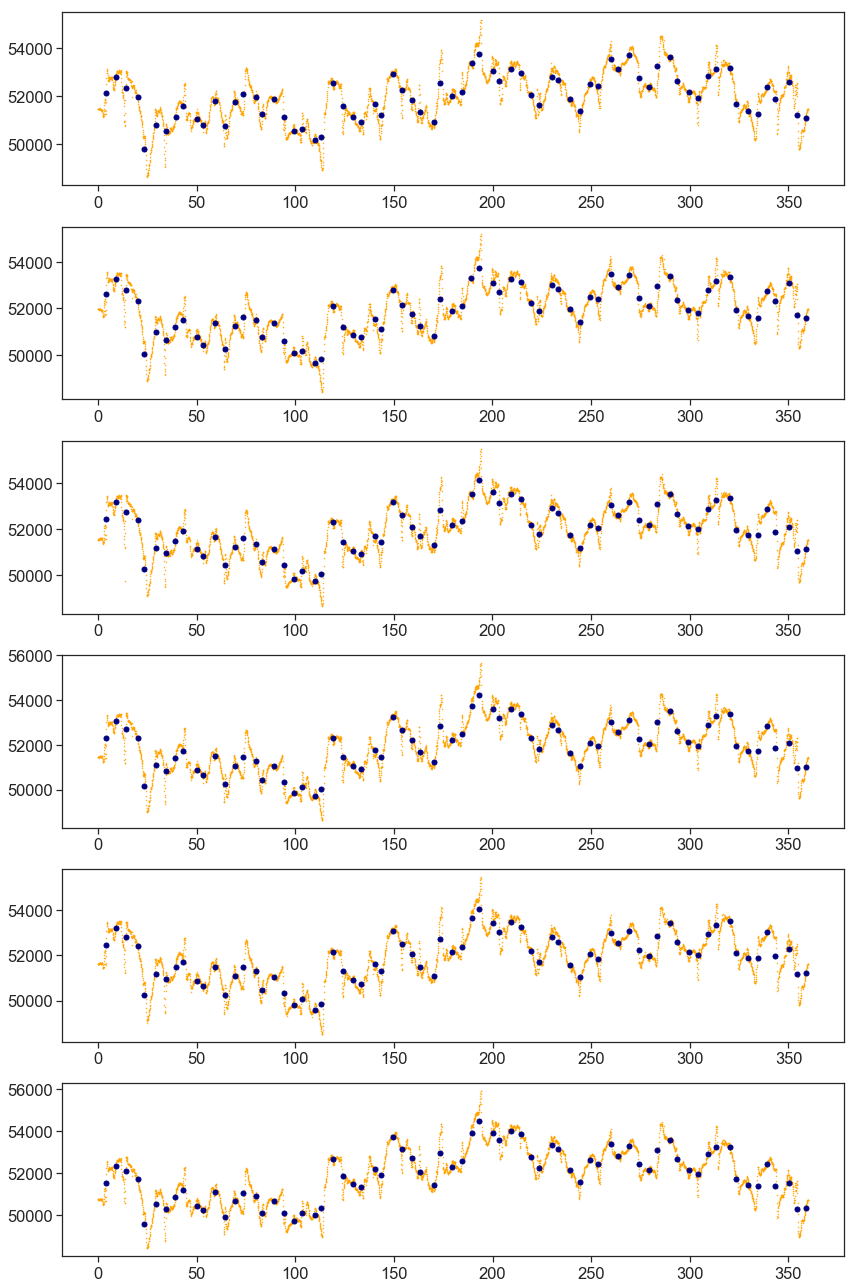

In [6]:
fig, axs = plt.subplots(6,1)
plt.sca(axs[0])
plt.plot(tr_moment_df_1['tr_phi'], tr_moment_df_1['tr,m1'], '.', color='orange', markersize=1)
plt.plot(trfp.STATION_BARCODE_PHI, tr_baseline_1[:,0], '.', color='navy', markersize=10)

plt.sca(axs[1])
plt.plot(tr_moment_df_2['tr_phi'], tr_moment_df_2['tr,m1'], '.', color='orange', markersize=1)
plt.plot(trfp.STATION_BARCODE_PHI, tr_baseline_2[:,0], '.', color='navy', markersize=10)

plt.sca(axs[2])
plt.plot(tr_moment_df_3['tr_phi'], tr_moment_df_3['tr,m1'], '.', color='orange', markersize=1)
plt.plot(trfp.STATION_BARCODE_PHI, tr_baseline_3[:,0], '.', color='navy', markersize=10)

plt.sca(axs[3])
plt.plot(tr_moment_df_4['tr_phi'], tr_moment_df_4['tr,m1'], '.', color='orange', markersize=1)
plt.plot(trfp.STATION_BARCODE_PHI, tr_baseline_4[:,0], '.', color='navy', markersize=10)

plt.sca(axs[4])
plt.plot(tr_moment_df_5['tr_phi'], tr_moment_df_5['tr,m1'], '.', color='orange', markersize=1)
plt.plot(trfp.STATION_BARCODE_PHI, tr_baseline_5[:,0], '.', color='navy', markersize=10)

plt.sca(axs[5])
plt.plot(tr_moment_df_6['tr_phi'], tr_moment_df_6['tr,m1'], '.', color='orange', markersize=1)
plt.plot(trfp.STATION_BARCODE_PHI, tr_baseline_6[:,0], '.', color='navy', markersize=10)

fig.set_size_inches(12,18)
fig.tight_layout()

In [7]:
vtm_df_1 = helper.vtm_calc(fp_moment_df_1,
             baseline_time_1, baseline_time_2,
             tr_baseline_1, tr_baseline_2,
             fp_baseline_1, fp_baseline_2)

vtm_df_2 = helper.vtm_calc(fp_moment_df_2,
             baseline_time_3, baseline_time_4,
             tr_baseline_3, tr_baseline_4,
             fp_baseline_3, fp_baseline_4)
vtm_df_3 = helper.vtm_calc(fp_moment_df_3,
             baseline_time_4, baseline_time_5,
             tr_baseline_4, tr_baseline_5,
             fp_baseline_4, fp_baseline_5)
vtm_df_4 = helper.vtm_calc(fp_moment_df_4,
             baseline_time_5, baseline_time_6,
             tr_baseline_5, tr_baseline_6,
             fp_baseline_5, fp_baseline_6)

In [8]:
vtm_df = vtm_df_1.copy()
vtm_df = vtm_df.append(vtm_df_2)
vtm_df = vtm_df.append(vtm_df_3)
vtm_df = vtm_df.append(vtm_df_4)

In [9]:
# bin and average

bin_size = 1000

lowest_edge = np.ceil(np.min(vtm_df.index.values)/bin_size)*bin_size
highest_edge = np.floor(np.max(vtm_df.index.values)/bin_size)*bin_size
bins = np.arange(lowest_edge, highest_edge + bin_size, bin_size)
num_bins = len(bins) - 1
bin_centers = np.arange(lowest_edge, highest_edge, bin_size) + bin_size/2

vtm_bin_df = vtm_df.groupby(pd.cut(vtm_df.index, bins)).mean()
vtm_bin_df.index = bin_centers
vtm_bin_df.head()

,"st0,m1","st0,m2","st0,m3","st0,m4","st0,m5","st0,m6","st1,m1","st1,m2","st1,m3","st1,m4",...,"tr,m17","tr,m2","tr,m3","tr,m4","tr,m5","tr,m6","tr,m7","tr,m8","tr,m9",tr_phi
1.525282e+09,52611.170439,100.312194,-57.834719,-24.341044,-12.155866,101.615922,51070.280905,61.459850,70.600479,360.683730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.525282e+09,52612.997687,98.835625,-57.794423,-24.496101,-12.695796,99.169895,51024.308329,40.216427,73.949115,362.591120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.525284e+09,52623.162537,101.391113,-57.426601,-23.890549,-9.603018,109.120971,51092.016227,30.940199,74.343720,369.140846,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.525284e+09,52607.650341,93.197313,-58.437472,-25.748938,-16.671121,103.158309,50975.404684,11.884051,78.040534,367.889534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.525286e+09,52651.614513,102.147526,-56.706237,-24.164562,-1.366607,115.429493,51045.475592,26.370844,75.705571,367.100361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
azi_avg_df = pd.DataFrame(np.zeros((vtm_bin_df.shape[0],6)),
                         index = vtm_bin_df.index,
                         columns = ['m' + str(m) for m in np.arange(6)+1])

weight = np.full(72, 5)
total_weight = np.sum(weight)

for m in np.arange(6):
    stm_list = ['st'+str(st)+',m'+str(m+1) for st in np.arange(72)]
    azi_avg_df['m'+str(m+1)] = vtm_bin_df[stm_list].multiply(weight).sum(axis=1)/total_weight
    
# apply blinds
for m in range(6):
    azi_avg_df['m'+str(m+1)] += blinds[m]

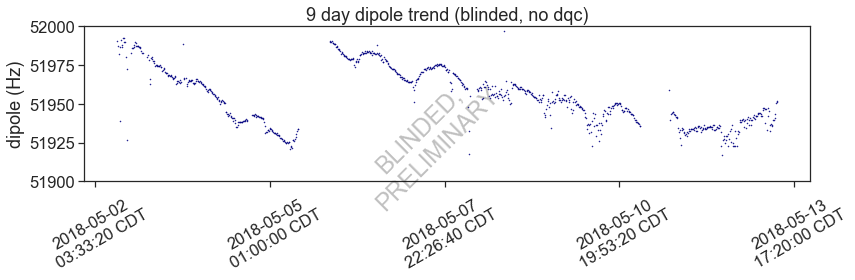

In [11]:
plot_df = azi_avg_df.copy()
plot_df = plot_df[plot_df['m1']>40000]

fig, ax = plt.subplots(1,1)
plt.sca(ax)
plt.plot(plot_df.index.values, plot_df['m1'], '.', color='navy', markersize=1)
plt2.plt_unix_time_to_CST(ax)

ax.set_ylim(51900,52000)
plt2.plt_set_labels(ax, '', 'dipole (Hz)', '9 day dipole trend (blinded, no dqc)')
plt2.fig_watermark(fig)

fig.set_size_inches(12,4)
fig.tight_layout()

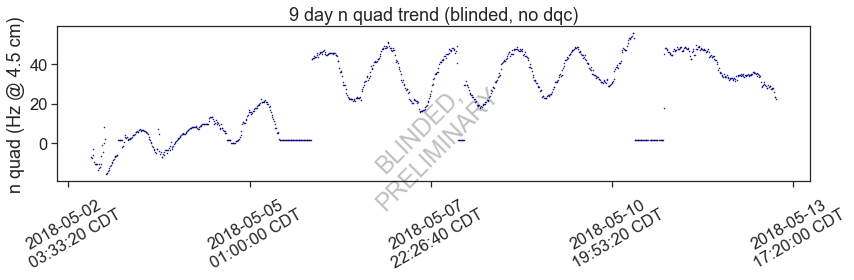

In [12]:
plot_df = azi_avg_df.copy()
plot_df = plot_df[plot_df['m2'] < 250]

fig, ax = plt.subplots(1,1)
plt.sca(ax)
plt.plot(plot_df.index.values, plot_df['m2'], '.', color='navy', markersize=1)
plt2.plt_unix_time_to_CST(ax)

# ax.set_ylim(51900,52000)
plt2.plt_set_labels(ax, '', 'n quad (Hz @ 4.5 cm)', '9 day n quad trend (blinded, no dqc)')
plt2.fig_watermark(fig)

fig.set_size_inches(12,4)
fig.tight_layout()

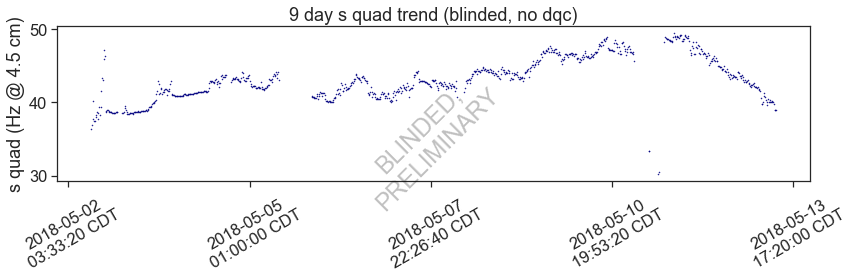

In [15]:
plot_df = azi_avg_df.copy()
plot_df = plot_df[plot_df['m3'] > 30]

fig, ax = plt.subplots(1,1)
plt.sca(ax)
plt.plot(plot_df.index.values, plot_df['m3'], '.', color='navy', markersize=1)
plt2.plt_unix_time_to_CST(ax)

# ax.set_ylim(51900,52000)
plt2.plt_set_labels(ax, '', 's quad (Hz @ 4.5 cm)', '9 day s quad trend (blinded, no dqc)')
plt2.fig_watermark(fig)

fig.set_size_inches(12,4)
fig.tight_layout()

/home/aetb/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


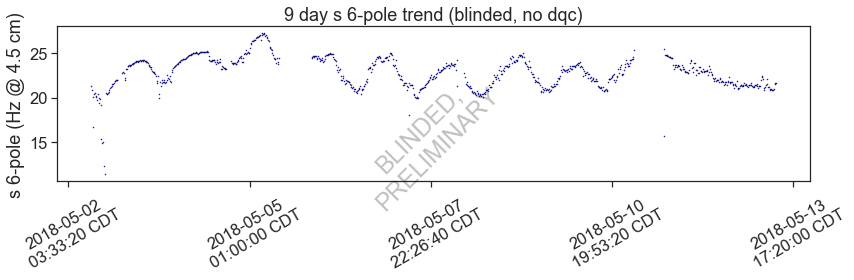

In [26]:
plot_df = azi_avg_df.copy()
plot_df = plot_df[plot_df['m4'] > 10][plot_df['m4'] < 70]

fig, ax = plt.subplots(1,1)
plt.sca(ax)
plt.plot(plot_df.index.values, plot_df['m4'], '.', color='navy', markersize=1)
plt2.plt_unix_time_to_CST(ax)

# ax.set_ylim(51900,52000)
plt2.plt_set_labels(ax, '', 's 6-pole (Hz @ 4.5 cm)', '9 day s 6-pole trend (blinded, no dqc)')
plt2.fig_watermark(fig)

fig.set_size_inches(12,4)
fig.tight_layout()

/home/aetb/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


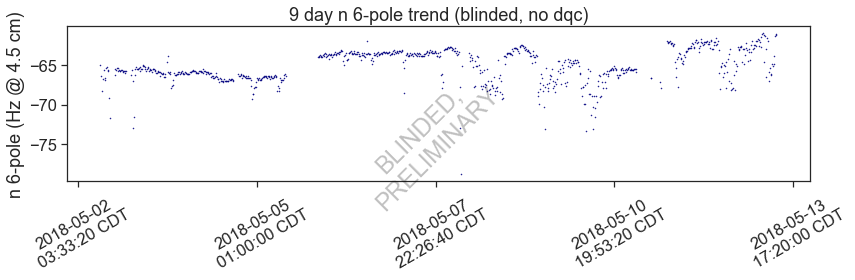

In [25]:
plot_df = azi_avg_df.copy()
plot_df = plot_df[plot_df['m5'] > -80][plot_df['m5'] < -60]

fig, ax = plt.subplots(1,1)
plt.sca(ax)
plt.plot(plot_df.index.values, plot_df['m5'], '.', color='navy', markersize=1)
plt2.plt_unix_time_to_CST(ax)

# ax.set_ylim(51900,52000)
plt2.plt_set_labels(ax, '', 'n 6-pole (Hz @ 4.5 cm)', '9 day n 6-pole trend (blinded, no dqc)')
plt2.fig_watermark(fig)

fig.set_size_inches(12,4)
fig.tight_layout()